In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [4]:
leads_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)

In [7]:
# checking the columns for null values
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
# dropping the columns with missing values greater than or equal to 40% .
leads_data=leads_data.drop(columns=['Lead Number','Prospect ID','How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score','What matters most to you in choosing a course'])

In [9]:
# Finding the null percentages across columns after removing the above columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                              37.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates About Our Courses       0.0
Tags                

In [10]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Country                                   6779 non-null   object 
 10  Specialization                      

In [11]:
print(leads_data['Specialization'].dtype)
print(leads_data['Specialization'].isnull().sum())

object
3380


In [12]:
leads_data['Specialization'] = leads_data['Specialization'].fillna('Unknown')
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates About Our Courses       0.0
Tags                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

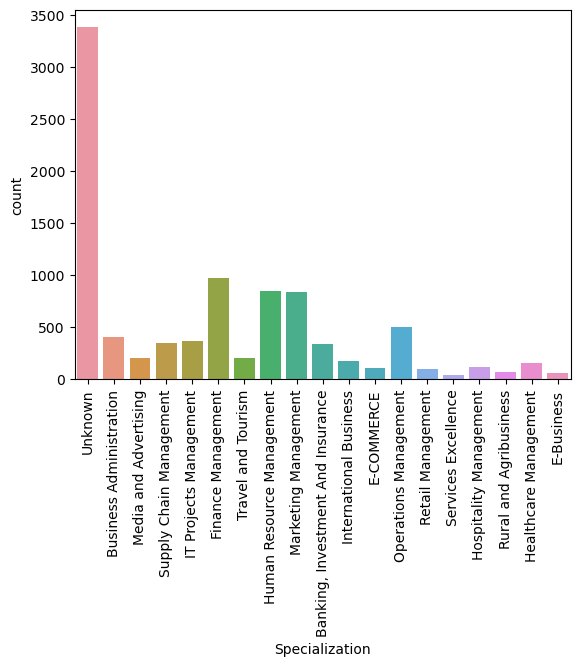

In [13]:
sns.countplot(x='Specialization',data=leads_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

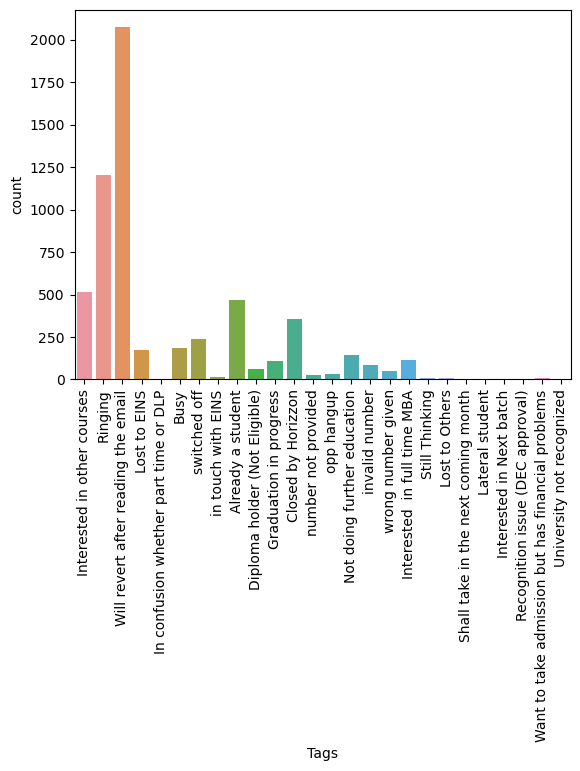

In [14]:
sns.countplot(x='Tags',data=leads_data)
plt.xticks(rotation=90)

In [15]:
leads_data['Tags']=leads_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [16]:
round(leads_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [17]:
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [18]:
leads_data['Country']=leads_data['Country'].replace(np.nan,'India')

In [19]:
round(leads_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [20]:
leads_data['City']=leads_data['City'].replace(np.nan,'Mumbai')

In [21]:
# Finding the null percentages across columns after removing the above columns
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [22]:
leads_data.dropna(inplace = True)

In [23]:
round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [24]:
varlist = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Newspaper Article','X Education Forums']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [25]:
leads_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website   India  ...                     0   
1             Email Opened   India  ...                     0   
2             Email Opened   India  ...                     0   
3              Unreachable   India  ...                     0   
4        Converted to Lead   India  ...                     0   

  Through Recommendations  Receive More Updates About Our Courses  \
0                       0                                       0   
1                       0                                       0   
2                       0                                       0   
3                       0                                       0   
4                       0                                       0   

                                  Tags  Update me on Supply Chain Content  \
0          Interested in other courses                                  0   
1                              Ringing                                  0   
2  Will revert after reading the email                                  0   
3                              Ringing                                  0   
4  Will revert after reading the email                                  0   

   Get updates on DM Content    City  \
0                          0  Mumbai   
1                          0  Mumbai   
2                          0  Mumbai   
3                          0  Mumbai   
4                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 27 columns]

In [26]:
leads_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website   India  ...                     0   
1             Email Opened   India  ...                     0   
2             Email Opened   India  ...                     0   
3              Unreachable   India  ...                     0   
4        Converted to Lead   India  ...                     0   

  Through Recommendations  Receive More Updates About Our Courses  \
0                       0                                       0   
1                       0                                       0   
2                       0                                       0   
3                       0                                       0   
4                       0                                       0   

                                  Tags  Update me on Supply Chain Content  \
0          Interested in other courses                                  0   
1                              Ringing                                  0   
2  Will revert after reading the email                                  0   
3                              Ringing                                  0   
4  Will revert after reading the email                                  0   

   Get updates on DM Content    City  \
0                          0  Mumbai   
1                          0  Mumbai   
2                          0  Mumbai   
3                          0  Mumbai   
4                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 27 columns]

In [27]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   int64  
 3   Do Not Call                               9074 non-null   int64  
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Country                                   9074 non-null   object 
 10  Specialization                      

In [28]:
#Check the lead conversion rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

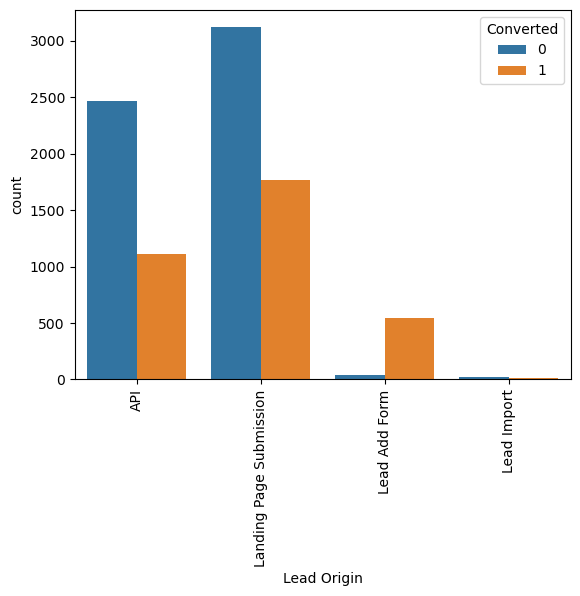

In [29]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis
1) conversion rate is close to 37%
2) Most lead come from add forms 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

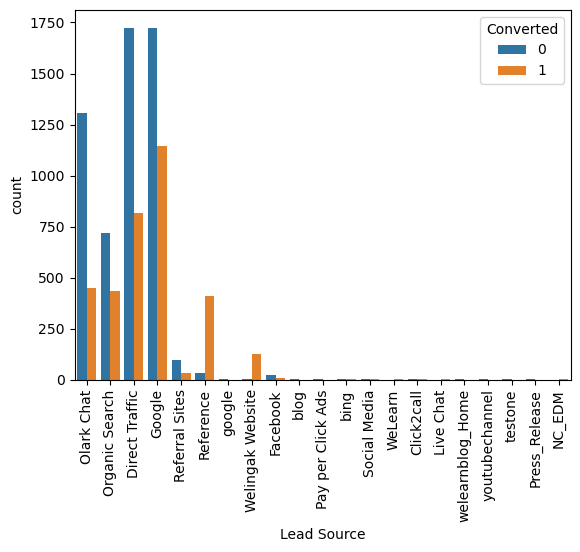

In [30]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis
1) Most leads come from Olark Chart,Organic Search,Direct Traffic,Google
2) Some leads also come from Reference and welingak Website though the lead count is low but their conversion rate is High 

In [31]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [32]:
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

<Axes: >

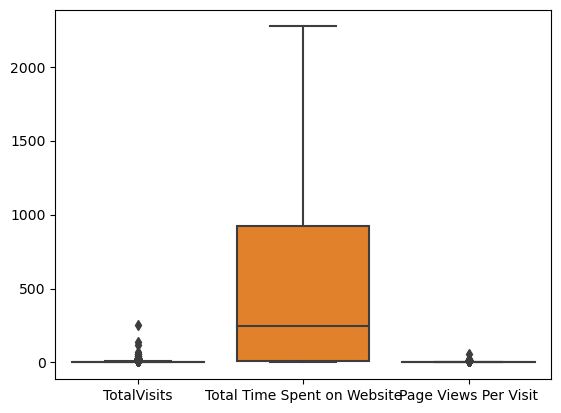

In [33]:
sns.boxplot(leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [34]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
#Clip Values Below the 5th Percentile:
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
#Clip Values above the 95th Percentile:
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\182711595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\182711595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]


<Axes: >

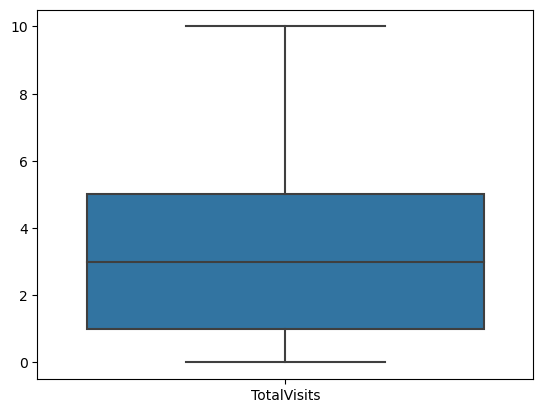

In [35]:
sns.boxplot(leads_data[['TotalVisits']])

In [36]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
#Clip Values Below the 5th Percentile:
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
#Clip Values above the 95th Percentile:
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\3873409468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\3873409468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


<Axes: >

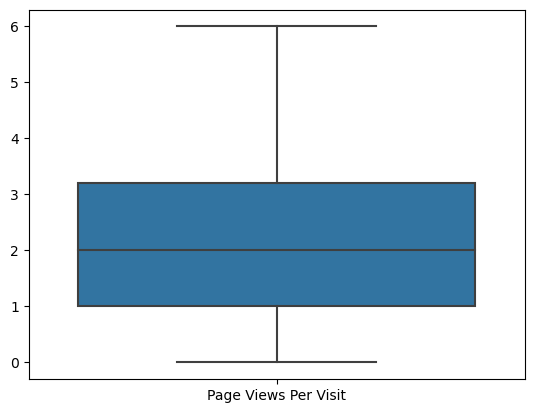

In [37]:
sns.boxplot(leads_data[['Page Views Per Visit']])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

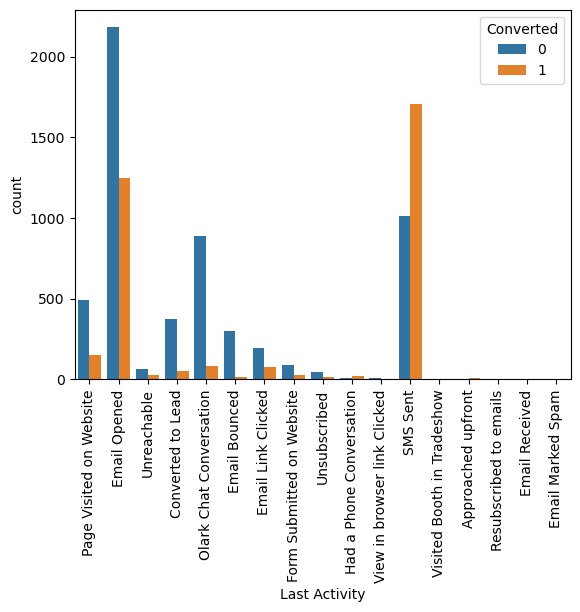

In [38]:
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis
1) Email opened was the last activity performed by the most 
2) Conversion rate is high of sms sent

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

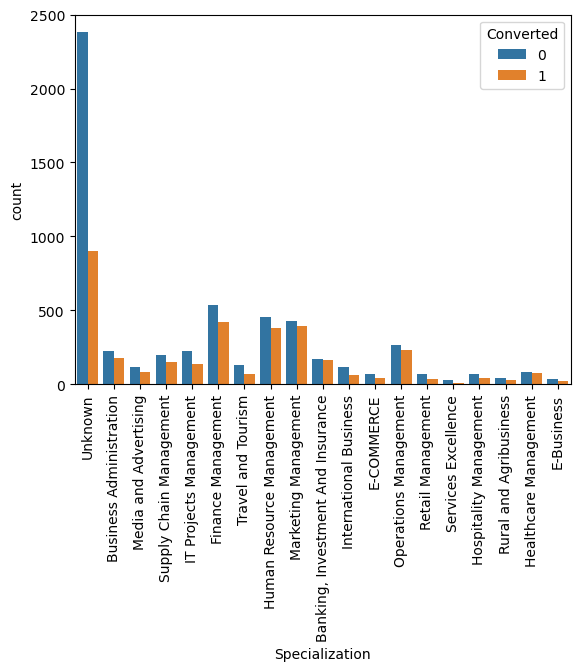

In [39]:
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis
1) We should target people having specialization in Finance Management,HR,Marketing Management,Banking Investment and Insurance,Operation Management and Health care Mangement as the lead conversion rate is only slightly lesser than 50%

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

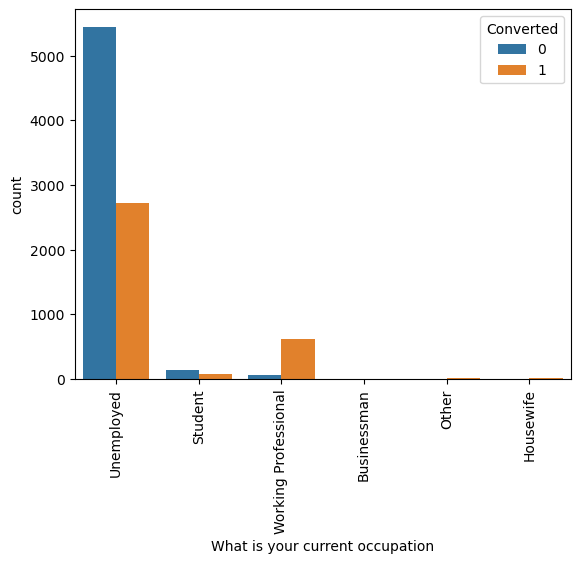

In [40]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis
1) Working Professionals have a high conversion rate 
2) Unemployed people are the most in number but they have a low conversion rate 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

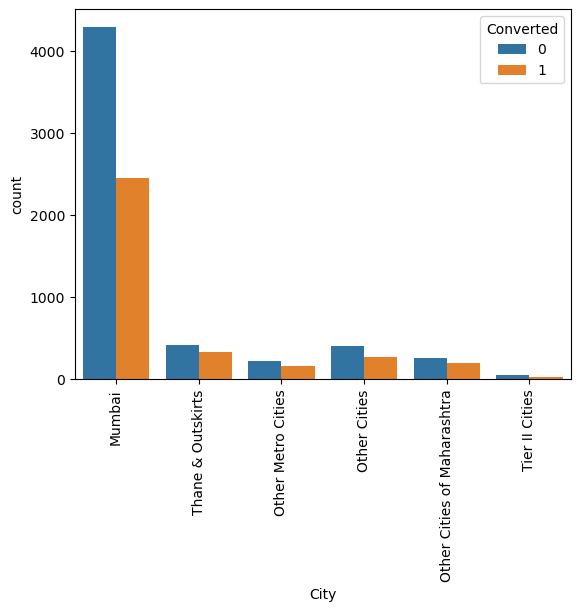

In [41]:
sns.countplot(x = "City", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Analysis 
Most leads come from mumbai city 

In [42]:
# Drop other columns which dont add any value 
leads_data = leads_data.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\3230499089.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_data = leads_data.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',


In [43]:
leads_data.shape

(9074, 13)

In [44]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   int64  
 3   Do Not Call                      9074 non-null   int64  
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

In [45]:
# Finding the percentage of the different categories of this column:
round(leads_data['Do Not Email'].value_counts(normalize=True),2)*100

0    92.0
1     8.0
Name: Do Not Email, dtype: float64

In [46]:
round(leads_data['Do Not Call'].value_counts(normalize=True),2)*100

0    100.0
1      0.0
Name: Do Not Call, dtype: float64

In [47]:
# it looks like the data above is skewed so lets drop them 
leads_data=leads_data.drop(['Do Not Email','Do Not Call'],1)

C:\Users\F5370833\AppData\Local\Temp\ipykernel_18320\3184967771.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_data=leads_data.drop(['Do Not Email','Do Not Call'],1)


In [48]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Converted                        9074 non-null   int64  
 3   TotalVisits                      9074 non-null   float64
 4   Total Time Spent on Website      9074 non-null   int64  
 5   Page Views Per Visit             9074 non-null   float64
 6   Last Activity                    9074 non-null   object 
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   City                             9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 850.7+ KB


In [49]:
# Create Dummies for categoriacal variables 
dummy_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  ...  \
0                       1                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [50]:
# Concatenating the dummy_data to the lead_data dataframe
leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  ...  \
0                  Unknown                      Unemployed  Mumbai  ...   
1                  Unknown                      Unemployed  Mumbai  ...   
2  Business Administration                         Student  Mumbai  ...   
3    Media and Advertising                      Unemployed  Mumbai  ...   
4                  Unknown                      Unemployed  Mumbai  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2             

In [51]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [52]:
leads_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0 

In [53]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Lead Source_Direct Traffic                            9074 non-null   uint8  
 8   Lead Source_Facebook                                  9074

In [54]:
#Create test train split 

In [55]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

Y = leads_data['Converted']


In [56]:
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [57]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.432779                    -0.160255             -0.155018   
1012    -0.432779                    -0.540048             -0.155018   
9226    -1.150329                    -0.888650             -1.265540   
4750    -0.432779                     1.643304             -0.155018   
7987     0.643547                     2.017593              0.122613   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
3009                     0                   0                      0  ...   
1012                     0                   0                      0  ...   
9226                     0                   0                      0  ...   
4750                     0                   0                      0  ...   
7987                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                 

In [60]:
# Checking the Lead Conversion rate
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

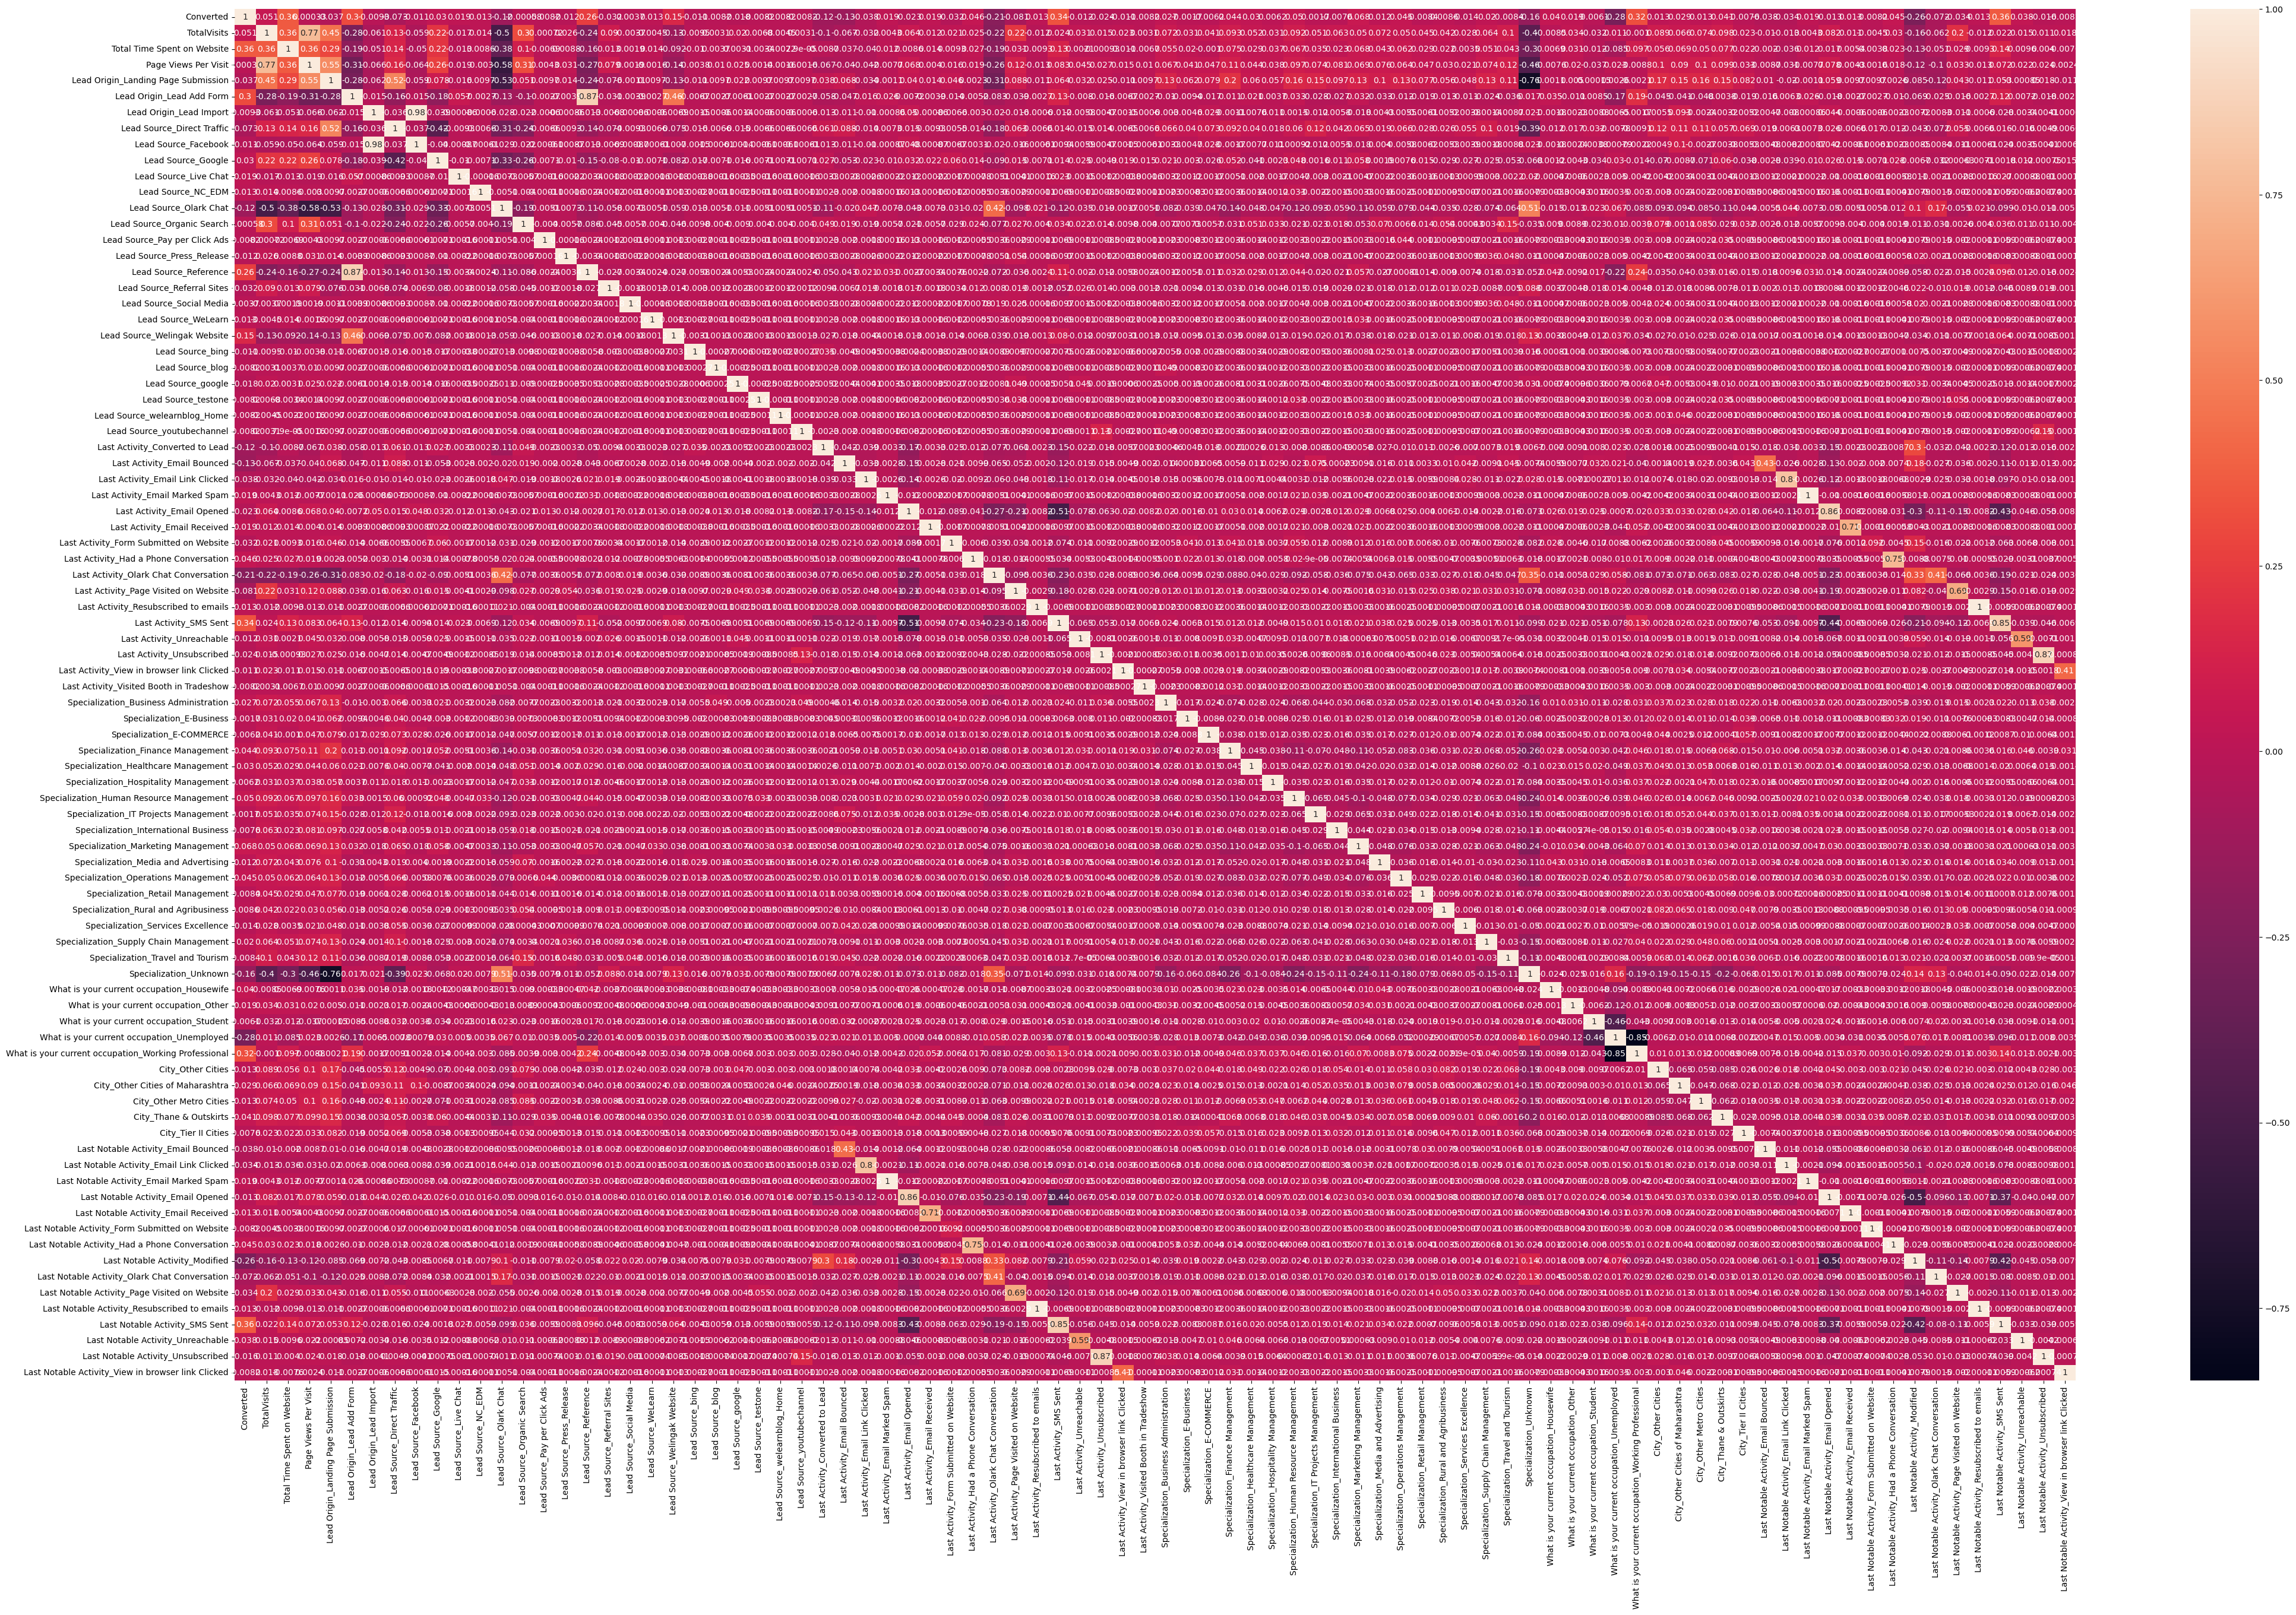

In [61]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,30))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=model , n_features_to_select=15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [63]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False])

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 60),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 12),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 22),
 ('Lead Source_google', False, 13),
 ('Lead Source_testone', False, 45),
 ('Lead Source_welearnblog_Home', False, 35),
 ('L

In [65]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [66]:
import statsmodels.api as sm

In [67]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.5
Date:                Sun, 18 Aug 2024   Deviance:                       5243.0
Time:                        09:08:51   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3980
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3972      0.617      0.643      0.520      -0.813       1.607
Total Time Spent on Website                              1.1100      0.040     27.485      0.000       1.031       1.189
Lead Origin_Landing Page Submission                     -1.1409      0.129     -8.832      0.000      -1.394      -0.888
Lead Origin_Lead Add Form                                1.5051      0.896      1.680      0.093      -0.250       3.260
Lead Origin_Lead Import                                  1.0322      0.475      2.174      0.030       0.102       1.963
Lead Source_Olark Chat                                   1.1123      0.123      9.021      0.000       0.871       1.354
Lead Source_Reference                                    1.8083      0.919      1.969      0.049       0.008       3.609
Lead Source_Welingak Website                             4.3635      1.153      3.784      0.000       2.103       6.624
Last Activity_Converted to Lead                         -1.1768      0.220     -5.343      0.000      -1.608      -0.745
Last Activity_Email Bounced                             -2.1719      0.377     -5.757      0.000      -2.911      -1.432
Last Activity_Had a Phone Conversation                   1.4071      1.043      1.349      0.177      -0.638       3.452
Last Activity_Olark Chat Conversation                   -1.4620      0.165     -8.875      0.000      -1.785      -1.139
Last Activity_Resubscribed to emails                    23.8992   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Specialization_Unknown                                  -1.1022      0.125     -8.804      0.000      -1.348      -0.857
What is your current occupation_Housewife               22.1871   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Student                 -0.2952      0.654     -0.452      0.652      -1.577       0.986
What is your current occupation_Unemployed              -0.7541      0.615     -1.226      0.220      -1.959       0.451
What is your current occupation_Working Professional     1.9034      0.642      2.965      0.003       0.645       3.162
Last Notable Activity_Had a Phone Conversation           2.0861      1.515      1.377      0.168      -0.883       5.055
Last Notable Activity_SMS Sent                           1.5248      0.080     19.119      0.000       1.368       1.681
Last Notable Activity_Unreachable                        1.7135      0.466      3.677      0.000       0.800       2.627
========================================================================================================================
"""

In [68]:
col1 = cols.drop('Last Activity_Resubscribed to emails')

In [69]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Sun, 18 Aug 2024   Deviance:                       5246.1
Time:                        09:08:51   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3963      0.617      0.642      0.521      -0.814       1.606
Total Time Spent on Website                              1.1098      0.040     27.484      0.000       1.031       1.189
Lead Origin_Landing Page Submission                     -1.1395      0.129     -8.822      0.000      -1.393      -0.886
Lead Origin_Lead Add Form                                1.5047      0.896      1.680      0.093      -0.251       3.260
Lead Origin_Lead Import                                  1.0321      0.475      2.175      0.030       0.102       1.962
Lead Source_Olark Chat                                   1.1175      0.123      9.069      0.000       0.876       1.359
Lead Source_Reference                                    1.8087      0.919      1.969      0.049       0.008       3.609
Lead Source_Welingak Website                             4.3632      1.153      3.783      0.000       2.103       6.624
Last Activity_Converted to Lead                         -1.1774      0.220     -5.346      0.000      -1.609      -0.746
Last Activity_Email Bounced                             -2.1736      0.377     -5.761      0.000      -2.913      -1.434
Last Activity_Had a Phone Conversation                   1.4061      1.043      1.348      0.178      -0.639       3.451
Last Activity_Olark Chat Conversation                   -1.4662      0.165     -8.903      0.000      -1.789      -1.143
Specialization_Unknown                                  -1.1002      0.125     -8.789      0.000      -1.346      -0.855
What is your current occupation_Housewife               22.1867   1.51e+04      0.001      0.999   -2.96e+04    2.97e+04
What is your current occupation_Student                 -0.2965      0.654     -0.454      0.650      -1.578       0.985
What is your current occupation_Unemployed              -0.7539      0.615     -1.226      0.220      -1.959       0.451
What is your current occupation_Working Professional     1.9031      0.642      2.965      0.003       0.645       3.161
Last Notable Activity_Had a Phone Conversation           2.0866      1.515      1.377      0.168      -0.882       5.056
Last Notable Activity_SMS Sent                           1.5232      0.080     19.103      0.000       1.367       1.679
Last Notable Activity_Unreachable                        1.7122      0.466      3.674      0.000       0.799       2.626
========================================================================================================================
"""

In [70]:
col2 = col1.drop('What is your current occupation_Housewife')

In [71]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.6
Date:                Sun, 18 Aug 2024   Deviance:                       5251.2
Time:                        09:08:51   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9353      0.571      1.637      0.102      -0.184       2.055
Total Time Spent on Website                              1.1087      0.040     27.475      0.000       1.030       1.188
Lead Origin_Landing Page Submission                     -1.1319      0.129     -8.774      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5080      0.896      1.683      0.092      -0.248       3.264
Lead Origin_Lead Import                                  1.0351      0.475      2.181      0.029       0.105       1.965
Lead Source_Olark Chat                                   1.1186      0.123      9.077      0.000       0.877       1.360
Lead Source_Reference                                    1.8120      0.919      1.972      0.049       0.011       3.613
Lead Source_Welingak Website                             4.3609      1.153      3.781      0.000       2.100       6.621
Last Activity_Converted to Lead                         -1.1773      0.220     -5.347      0.000      -1.609      -0.746
Last Activity_Email Bounced                             -2.1739      0.377     -5.763      0.000      -2.913      -1.435
Last Activity_Had a Phone Conversation                   1.4066      1.043      1.349      0.177      -0.638       3.451
Last Activity_Olark Chat Conversation                   -1.4683      0.165     -8.908      0.000      -1.791      -1.145
Specialization_Unknown                                  -1.0962      0.125     -8.766      0.000      -1.341      -0.851
What is your current occupation_Student                 -0.8413      0.609     -1.382      0.167      -2.034       0.352
What is your current occupation_Unemployed              -1.2983      0.567     -2.291      0.022      -2.409      -0.188
What is your current occupation_Working Professional     1.3580      0.596      2.279      0.023       0.190       2.526
Last Notable Activity_Had a Phone Conversation           2.0847      1.515      1.376      0.169      -0.884       5.053
Last Notable Activity_SMS Sent                           1.5222      0.080     19.097      0.000       1.366       1.678
Last Notable Activity_Unreachable                        1.7082      0.467      3.661      0.000       0.794       2.623
========================================================================================================================
"""

In [72]:
col3 = col2.drop('Last Notable Activity_Had a Phone Conversation')

In [73]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Sun, 18 Aug 2024   Deviance:                       5253.2
Time:                        09:08:52   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9355      0.571      1.638      0.101      -0.184       2.055
Total Time Spent on Website                              1.1080      0.040     27.465      0.000       1.029       1.187
Lead Origin_Landing Page Submission                     -1.1313      0.129     -8.775      0.000      -1.384      -0.879
Lead Origin_Lead Add Form                                1.5081      0.896      1.684      0.092      -0.248       3.264
Lead Origin_Lead Import                                  1.0354      0.475      2.182      0.029       0.105       1.966
Lead Source_Olark Chat                                   1.1208      0.123      9.094      0.000       0.879       1.362
Lead Source_Reference                                    1.8128      0.919      1.973      0.048       0.012       3.613
Lead Source_Welingak Website                             4.3634      1.153      3.783      0.000       2.103       6.624
Last Activity_Converted to Lead                         -1.1767      0.220     -5.344      0.000      -1.608      -0.745
Last Activity_Email Bounced                             -2.1742      0.377     -5.763      0.000      -2.914      -1.435
Last Activity_Had a Phone Conversation                   2.5884      0.699      3.704      0.000       1.219       3.958
Last Activity_Olark Chat Conversation                   -1.4674      0.165     -8.902      0.000      -1.790      -1.144
Specialization_Unknown                                  -1.1004      0.125     -8.803      0.000      -1.345      -0.855
What is your current occupation_Student                 -0.8412      0.609     -1.382      0.167      -2.034       0.352
What is your current occupation_Unemployed              -1.2978      0.567     -2.290      0.022      -2.409      -0.187
What is your current occupation_Working Professional     1.3579      0.596      2.279      0.023       0.190       2.526
Last Notable Activity_SMS Sent                           1.5221      0.080     19.098      0.000       1.366       1.678
Last Notable Activity_Unreachable                        1.7078      0.467      3.660      0.000       0.793       2.622
========================================================================================================================
"""

In [74]:
col4 = col3.drop('What is your current occupation_Student')

In [75]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.6
Date:                Sun, 18 Aug 2024   Deviance:                       5255.2
Time:                        09:08:52   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2259      0.237      0.955      0.340      -0.238       0.690
Total Time Spent on Website                              1.1085      0.040     27.485      0.000       1.029       1.188
Lead Origin_Landing Page Submission                     -1.1418      0.129     -8.871      0.000      -1.394      -0.890
Lead Origin_Lead Add Form                                1.5027      0.896      1.678      0.093      -0.253       3.258
Lead Origin_Lead Import                                  1.0287      0.475      2.167      0.030       0.098       1.959
Lead Source_Olark Chat                                   1.1155      0.123      9.058      0.000       0.874       1.357
Lead Source_Reference                                    1.8166      0.919      1.978      0.048       0.016       3.617
Lead Source_Welingak Website                             4.3677      1.153      3.787      0.000       2.107       6.628
Last Activity_Converted to Lead                         -1.1801      0.220     -5.361      0.000      -1.612      -0.749
Last Activity_Email Bounced                             -2.1783      0.377     -5.775      0.000      -2.918      -1.439
Last Activity_Had a Phone Conversation                   2.5869      0.699      3.701      0.000       1.217       3.957
Last Activity_Olark Chat Conversation                   -1.4680      0.165     -8.914      0.000      -1.791      -1.145
Specialization_Unknown                                  -1.1094      0.125     -8.883      0.000      -1.354      -0.865
What is your current occupation_Unemployed              -0.5775      0.209     -2.758      0.006      -0.988      -0.167
What is your current occupation_Working Professional     2.0777      0.280      7.428      0.000       1.529       2.626
Last Notable Activity_SMS Sent                           1.5205      0.080     19.072      0.000       1.364       1.677
Last Notable Activity_Unreachable                        1.7116      0.466      3.675      0.000       0.799       2.624
========================================================================================================================
"""

In [76]:
col5 = col4.drop('Lead Origin_Lead Add Form')

In [77]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.1
Date:                Sun, 18 Aug 2024   Deviance:                       5258.3
Time:                        09:08:52   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3966
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2434      0.236      1.029      0.303      -0.220       0.707
Total Time Spent on Website                              1.1062      0.040     27.472      0.000       1.027       1.185
Lead Origin_Landing Page Submission                     -1.1606      0.128     -9.042      0.000      -1.412      -0.909
Lead Origin_Lead Import                                  1.0115      0.475      2.130      0.033       0.081       1.942
Lead Source_Olark Chat                                   1.1077      0.123      9.013      0.000       0.867       1.349
Lead Source_Reference                                    3.3037      0.241     13.712      0.000       2.832       3.776
Lead Source_Welingak Website                             5.8606      0.734      7.983      0.000       4.422       7.299
Last Activity_Converted to Lead                         -1.1821      0.220     -5.372      0.000      -1.613      -0.751
Last Activity_Email Bounced                             -2.1796      0.377     -5.778      0.000      -2.919      -1.440
Last Activity_Had a Phone Conversation                   2.5820      0.699      3.694      0.000       1.212       3.952
Last Activity_Olark Chat Conversation                   -1.4719      0.165     -8.939      0.000      -1.795      -1.149
Specialization_Unknown                                  -1.1219      0.125     -8.993      0.000      -1.366      -0.877
What is your current occupation_Unemployed              -0.5749      0.209     -2.745      0.006      -0.985      -0.164
What is your current occupation_Working Professional     2.0772      0.280      7.424      0.000       1.529       2.626
Last Notable Activity_SMS Sent                           1.5213      0.080     19.084      0.000       1.365       1.678
Last Notable Activity_Unreachable                        1.7073      0.466      3.666      0.000       0.795       2.620
========================================================================================================================
"""

### VIF

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  9.31
1                 Lead Origin_Landing Page Submission  5.73
10                             Specialization_Unknown  4.01
3                              Lead Source_Olark Chat  2.26
12  What is your current occupation_Working Profes...  1.63
13                     Last Notable Activity_SMS Sent  1.49
4                               Lead Source_Reference  1.46
9               Last Activity_Olark Chat Conversation  1.46
0                         Total Time Spent on Website  1.32
5                        Lead Source_Welingak Website  1.11
6                     Last Activity_Converted to Lead  1.10
7                         Last Activity_Email Bounced  1.07
2                             Lead Origin_Lead Import  1.03
8              Last Activity_Had a Phone Conversation  1.01
14                  Last Notable Activity_Unreachable  1.01

In [80]:
col5 = col5.drop('What is your current occupation_Unemployed')

In [81]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Sun, 18 Aug 2024   Deviance:                       5265.6
Time:                        09:08:52   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3959
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3078      0.124     -2.480      0.013      -0.551      -0.065
Total Time Spent on Website                              1.1068      0.040     27.500      0.000       1.028       1.186
Lead Origin_Landing Page Submission                     -1.1643      0.128     -9.066      0.000      -1.416      -0.913
Lead Origin_Lead Import                                  0.9940      0.475      2.093      0.036       0.063       1.925
Lead Source_Olark Chat                                   1.1149      0.123      9.072      0.000       0.874       1.356
Lead Source_Reference                                    3.3158      0.241     13.779      0.000       2.844       3.787
Lead Source_Welingak Website                             5.8519      0.734      7.972      0.000       4.413       7.291
Last Activity_Converted to Lead                         -1.1902      0.220     -5.403      0.000      -1.622      -0.758
Last Activity_Email Bounced                             -2.1832      0.378     -5.782      0.000      -2.923      -1.443
Last Activity_Had a Phone Conversation                   2.5634      0.699      3.668      0.000       1.194       3.933
Last Activity_Olark Chat Conversation                   -1.4661      0.164     -8.914      0.000      -1.788      -1.144
Specialization_Unknown                                  -1.1332      0.125     -9.076      0.000      -1.378      -0.889
What is your current occupation_Working Professional     2.6342      0.193     13.642      0.000       2.256       3.013
Last Notable Activity_SMS Sent                           1.5100      0.080     18.994      0.000       1.354       1.666
Last Notable Activity_Unreachable                        1.6956      0.464      3.651      0.000       0.785       2.606
========================================================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                              Lead Source_Olark Chat  2.06
10                             Specialization_Unknown  2.05
9               Last Activity_Olark Chat Conversation  1.45
12                     Last Notable Activity_SMS Sent  1.45
1                 Lead Origin_Landing Page Submission  1.39
0                         Total Time Spent on Website  1.30
4                               Lead Source_Reference  1.22
11  What is your current occupation_Working Profes...  1.19
5                        Lead Source_Welingak Website  1.09
6                     Last Activity_Converted to Lead  1.09
7                         Last Activity_Email Bounced  1.07
2                             Lead Origin_Lead Import  1.01
13                  Last Notable Activity_Unreachable  1.01
8              Last Activity_Had a Phone Conversation  1.00

### Final Model 
As now you can see VIF is well below the value of 3 that means the variables are ideal o build the model 

In [83]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Sun, 18 Aug 2024   Deviance:                       5265.6
Time:                        09:08:53   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3959
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3078      0.124     -2.480      0.013      -0.551      -0.065
Total Time Spent on Website                              1.1068      0.040     27.500      0.000       1.028       1.186
Lead Origin_Landing Page Submission                     -1.1643      0.128     -9.066      0.000      -1.416      -0.913
Lead Origin_Lead Import                                  0.9940      0.475      2.093      0.036       0.063       1.925
Lead Source_Olark Chat                                   1.1149      0.123      9.072      0.000       0.874       1.356
Lead Source_Reference                                    3.3158      0.241     13.779      0.000       2.844       3.787
Lead Source_Welingak Website                             5.8519      0.734      7.972      0.000       4.413       7.291
Last Activity_Converted to Lead                         -1.1902      0.220     -5.403      0.000      -1.622      -0.758
Last Activity_Email Bounced                             -2.1832      0.378     -5.782      0.000      -2.923      -1.443
Last Activity_Had a Phone Conversation                   2.5634      0.699      3.668      0.000       1.194       3.933
Last Activity_Olark Chat Conversation                   -1.4661      0.164     -8.914      0.000      -1.788      -1.144
Specialization_Unknown                                  -1.1332      0.125     -9.076      0.000      -1.378      -0.889
What is your current occupation_Working Professional     2.6342      0.193     13.642      0.000       2.256       3.013
Last Notable Activity_SMS Sent                           1.5100      0.080     18.994      0.000       1.354       1.666
Last Notable Activity_Unreachable                        1.6956      0.464      3.651      0.000       0.785       2.606
========================================================================================================================
"""

### Predictions on Training Set 

In [84]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.161182
1012    0.059976
9226    0.212541
4750    0.864910
7987    0.681552
1281    0.741265
2880    0.079621
4971    0.964748
7536    0.826495
1248    0.642044
dtype: float64

In [85]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16118174, 0.0599758 , 0.21254132, 0.86491029, 0.68155195,
       0.74126459, 0.07962122, 0.96474785, 0.82649493, 0.64204408])

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_prob
0          0        0.161182
1          0        0.059976
2          0        0.212541
3          1        0.864910
4          1        0.681552

In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  predicted
0          0        0.161182          0
1          0        0.059976          0
2          0        0.212541          0
3          1        0.864910          1
4          1        0.681552          1

### Confusion Matrix

In [88]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3453  452]
 [ 730 1716]]


In [89]:
# Predicted       not_converted    converted
# Actual
# not_converted        3453           452
# converted            730            1716  

In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8138875767595655


## Accuracy
The overall Accuracy of the model is around 81 %

### Matrics beyond Simple accuracy


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7015535568274734

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8842509603072983

In [94]:
# Calculate false postive rate - predicting Converted when customer has not converted
print(FP/ float(TN+FP))

0.11574903969270166


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.7915129151291513


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8254841023189099


###  Plotting the ROC Curve
An ROC curve demonstrates several things:

 1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in      specificity). 
 
 2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
 
 3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

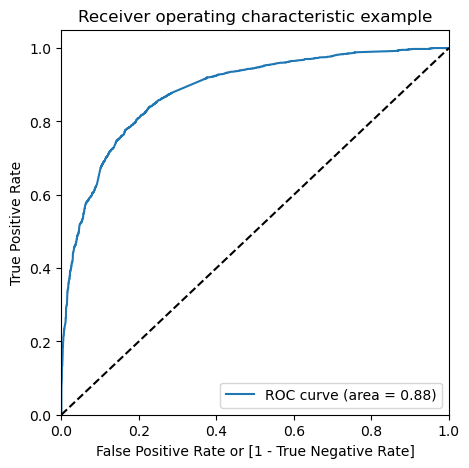

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Analysis 
Since our area under curve is close to 88 %. Our model is a good one 

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity. In our previous model we took the default cutoff of 0.5 , but we need an optimal cutoff to have the best sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.161182          0    1    1    0    0    0    0    0   
1          0        0.059976          0    1    0    0    0    0    0    0   
2          0        0.212541          0    1    1    1    0    0    0    0   
3          1        0.864910          1    1    1    1    1    1    1    1   
4          1        0.681552          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602267  0.970155  0.371831
0.2   0.2  0.737994  0.919460  0.624328
0.3   0.3  0.794678  0.845871  0.762612
0.4   0.4  0.812470  0.776370  0.835083
0.5   0.5  0.813888  0.701554  0.884251
0.6   0.6  0.797040  0.593622  0.924456
0.7   0.7  0.785388  0.520442  0.951344
0.8   0.8  0.757991  0.417416  0.971319
0.9   0.9  0.714376  0.277187  0.988220


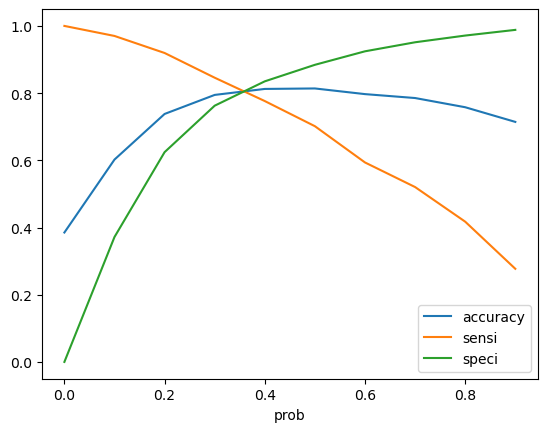

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Analysis 
0.37 is the optimal cutoff point 

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.161182          0    1    1    0    0    0    0    0   
1          0        0.059976          0    1    0    0    0    0    0    0   
2          0        0.212541          0    1    1    1    0    0    0    0   
3          1        0.864910          1    1    1    1    1    1    1    1   
4          1        0.681552          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                1

In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8068020784128483

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3181,  724],
       [ 503, 1943]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.794358135731807

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8145966709346991

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1854033290653009


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7285339332583427


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8634636264929425


### Final Model analysis
 1) Overall accuracy of the model is close to 80 %
 2) Sensitivity is around  81%
 3) Specificity is around  79%
 4) False positive rate is 20%
 5) Positive predictive value is 71%
 6) Negative Predictive value is 87%
#### Overall the model is pretty good for use  

### Assigning Lead Score

In [112]:
y_train_pred_final['lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.161182          0    1    1    0    0    0    0    0   
1          0        0.059976          0    1    0    0    0    0    0    0   
2          0        0.212541          0    1    1    1    0    0    0    0   
3          1        0.864910          1    1    1    1    1    1    1    1   
4          1        0.681552          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  lead_Score  
0    0    0    0                0          16  
1    0    0    0                0           6  
2    0    0    0                0          21  
3    1    1    0                1          86  
4    0    0    0                1          68

## Precision and Recall

In [113]:
#Looking at the confusion matrix again

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3453,  452],
       [ 730, 1716]], dtype=int64)

##### Precision
TP / TP + FP

In [115]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7915129151291513

##### Recall
TP / TP + FN

In [116]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7015535568274734

#### Using sklearn utilities for the same

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
?precision_score

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7915129151291513

### Precision and recall tradeoff

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

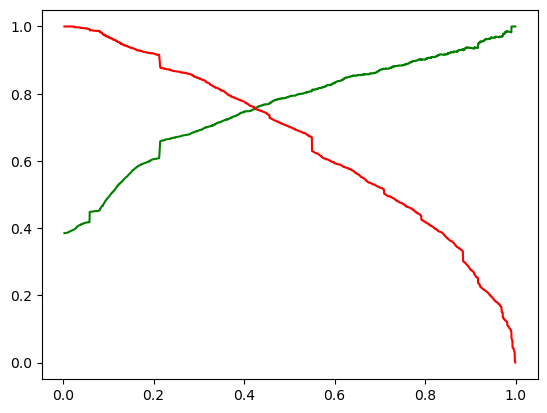

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [124]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3271     0.304501                    -0.591008              0.998931   
1490     0.666261                     1.894051              1.564920   
7936    -0.419021                    -0.743117             -0.133048   
4216    -1.142542                    -0.878732             -1.265027   
3830     1.751544                    -0.578179              2.130909   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3271                        0                           0   
1490                        0                           1   
7936                        0                           0   
4216                        0                           0   
3830                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
3271                     0                   1                      0  ...   
1490                     0                   0                      0  ...   
7936                     0                   1                      0  ...   
4216                     0                   0                      0  ...   
3830                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
3271                                                0   
1490                                                0   
7936                                                0   
4216                                                0   
3830                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3271                                               0   
1490                                               0   
7936                                               0   
4216                                               0   
3830                                               0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Page Visited on Website  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Resubscribed to emails  \
3271                                             0   
1490                                             0   
7936                                             0   
4216                                             0   
3830                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3271                               0                                  0   
1490                               0                                  0   
7936                               0                                  0   
4216                               0                                  0   
3830                 

In [125]:
X_test = X_test[col5]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
3271                    -0.591008                                    0   
1490                     1.894051                                    1   
7936                    -0.743117                                    0   
4216                    -0.878732                                    0   
3830                    -0.578179                                    1   

      Lead Origin_Lead Import  Lead Source_Olark Chat  Lead Source_Reference  \
3271                        0                       0                      0   
1490                        0                       0                      0   
7936                        0                       0                      0   
4216                        0                       0                      1   
3830                        0                       0                      0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
3271                             0                                0   
1490                             0                                0   
7936                             0                                0   
4216                             0                                0   
3830                             0                                0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
3271                            0                                       0   
1490                            0                                       0   
7936                            0                                       0   
4216                            0                                       0   
3830                            0                                       0   

      Last Activity_Olark Chat Conversation  Specialization_Unknown  \
3271                                      0                       1   
1490                                      0                       0   
7936                                      0                       1   
4216                                      0                       0   
3830                                      0                       0   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
3271                               0                                  0  
1490                               0                                  0  
7936                               0                                  0  
4216                               0                                  0  
3830                               0                                  0

In [126]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.109569
1490    0.962975
7936    0.094191
4216    0.884468
3830    0.107935
1800    0.585100
6507    0.337831
4821    0.257053
4223    0.917754
4714    0.214384
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
# Let's see the head
y_pred_1.head()

0
3271  0.109569
1490  0.962975
7936  0.094191
4216  0.884468
3830  0.107935

In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

Converted         0
3271          0  0.109569
1490          1  0.962975
7936          0  0.094191
4216          1  0.884468
3830          0  0.107935

In [132]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [133]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Converted_prob
3271          0        0.109569
1490          1        0.962975
7936          0        0.094191
4216          1        0.884468
3830          0        0.107935

In [134]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [135]:
y_pred_final.head()

Converted  Converted_prob  final_predicted
3271          0        0.109569                0
1490          1        0.962975                1
7936          0        0.094191                0
4216          1        0.884468                1
3830          0        0.107935                0

In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8068307014322439

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1414,  320],
       [ 206,  783]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7917087967644085

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8154555940023068

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1845444059976932


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7098821396192203


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8728395061728395


# Final Analysis On Test set 
1) Sensitivity is at 79%
2) Specificity is at 81%
3) False Positive rate is at 18%
4) Positive Predictive value is at 70%
5) Negative predictive value is 87%
6) Accuracy is around 81%

In [144]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

Converted  Converted_prob  final_predicted  Lead_Score
3271          0        0.109569                0          11
1490          1        0.962975                1          96
7936          0        0.094191                0           9
4216          1        0.884468                1          88
3830          0        0.107935                0          11